In [2]:
!rm -r AI2021MA
!git clone https://github.com/UmbertoJr/AI2021MA.git

rm: cannot remove 'AI2021MA': No such file or directory
Cloning into 'AI2021MA'...
remote: Enumerating objects: 1054, done.
remote: Counting objects: 100% (267/267), done.
remote: Compressing objects: 100% (174/174), done.
remote: Total 1054 (delta 165), reused 176 (delta 87), pack-reused 787
Receiving objects: 100% (1054/1054), 3.82 MiB | 26.07 MiB/s, done.
Resolving deltas: 100% (646/646), done.


# Genetics Algorithm (GA) for Dejong Function Optimization (FO)

## De Jong Functions

De Jong 2,
total dim: 2,
range interval: (-2.048, 2.047),
resolution factor: 0.001,
number of bits 12


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


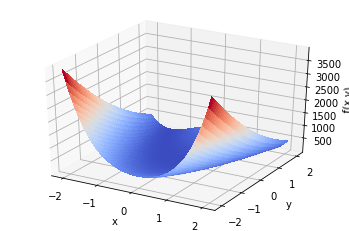

In [3]:
from AI2021MA.DeJong import De_Jong

example = De_Jong(2)
print(f"{example.function_name},\ntotal dim: {example.dimension},\nrange interval: {example.range},\nresolution factor: {example.resolution_factor},\nnumber of bits {example.num_bits}")
example.plot()

De Jong 3,
total dim: 4,
range interval: (-5.12, 5.11),
resolution factor: 0.01,
number of bits 10


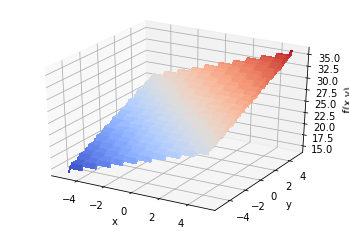

In [4]:
example = De_Jong(3)
print(f"{example.function_name},\ntotal dim: {example.dimension},\nrange interval: {example.range},\nresolution factor: {example.resolution_factor},\nnumber of bits {example.num_bits}")
example.plot()

De Jong 5,
total dim: 2,
range interval: (-65.536, 65.535),
resolution factor: 0.001,
number of bits 17


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


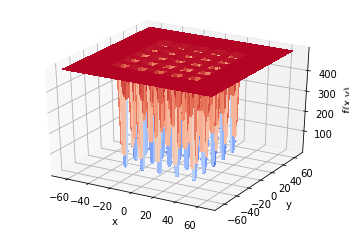

In [5]:
example = De_Jong(5)
print(f"{example.function_name},\ntotal dim: {example.dimension},\nrange interval: {example.range},\nresolution factor: {example.resolution_factor},\nnumber of bits {example.num_bits}")
example.plot()

## Gray encode and Decode functions

In [6]:
import numpy as np
from AI2021MA.DeJong import De_Jong
import random
import matplotlib.pyplot as plt

example = De_Jong(2)
print("DEC    =>    GRAY    => DEC")
numbers = np.around(np.linspace(example.range[0], example.range[1], 3), 2)
for i in numbers:
  gray = example.gray_encode(i)
  dec = example.gray_decode(gray)
  print(f" {i:.2f}  => {gray} => {dec}")
print('')
print('')

population = [0,0,1]

DEC    =>    GRAY    => DEC
 -2.05  => 000000000001 => -2.047
 -0.00  => 110000000000 => 0.0
 2.05  => 1100000000011 => 2.05




## GA class 

In [7]:
DJ2 = De_Jong(2)
DJ3 = De_Jong(3)
DJ5 = De_Jong(5)


class GAforDJ:
  population_dim = 20
  iterations = 600 
  mutation_rate = 0.01
  population = []

  def __init__(self, dj_instance):
    #initialise random coords from range given in each problem
    init_population = []
    for i in range(self.population_dim):
      #initialise population with the appropriate characteristics

      init_population.append(np.round(np.random.uniform(dj_instance.range[0], dj_instance.range[1], int(dj_instance.dimension)), -int(np.log10(dj_instance.resolution_factor))))
    
    self.population = init_population
    print(init_population)
    self.num_bits = dj_instance.num_bits
    self.dj_instance = dj_instance
    
    

  def roulette_sel(self):
    #selection probability is directly proportional to the fitness of each individual relative to the overall population
    #call subsquent functions 
    population_matrix = []   # matrix with individuals represented by rows
    iter_count = 0
    #initial loop - takes in starting population and outputs grey code on which to apply crossover and mutation
    for inidividual in range(len(self.population)):   # for each member of the population
      new_individuals = []
      for chrom in range(len(self.population[0])): # for each chromosome of each member
        new_individuals.append(self.dj_instance.gray_encode(self.population[inidividual][chrom])) # grey encode each chromosome of each individual
      population_matrix.append(new_individuals)  # append each grey coded individual to population matrix 
    
    #statistics to store across iterations for plotting
    population_min = [min(self.dj_instance.evaluate(population_matrix, gray_=True))]
    population_avg = [np.mean(self.dj_instance.evaluate(population_matrix, gray_=True))]   
    population_std = [np.std(self.dj_instance.evaluate(population_matrix, gray_=True))] 

    #subsequent iterations
    while iter_count < self.iterations:
      population_fitness = self.dj_instance.evaluate(population_matrix, gray_=True) # list of function evaluations for each individual - minimise
      min_fitness = max(population_fitness)                                         # the lower the function value, the fitter the individual
      total_fitness = sum(population_fitness)
      norm_population = [(min_fitness-i)/total_fitness for i in population_fitness]      # normalising fitness values such that a higher function value equates to lower fitness 
                                                                                         # and thus lower probability to get selected below                                                                    
      #pick the couples                 
      mother_list = random.choices(population_matrix, weights=norm_population, k=10)  # list of 10 random chromosome sets
      father_list = random.choices(population_matrix, weights=norm_population, k=10)  # list of 10 random chromosome sets 
      
      #perform crossover
      population_matrix = self.crossover(mother_list, father_list)
    
      #peform mutation
      population_matrix = self.mutation(population_matrix)
      # print(self.dj_instance.evaluate(population_matrix, gray_=True))

      #statistics to store across iterations
      population_min.append(min(self.dj_instance.evaluate(population_matrix, gray_=True)))
      population_avg.append(np.mean(self.dj_instance.evaluate(population_matrix, gray_=True)))   
      population_std.append(np.std(self.dj_instance.evaluate(population_matrix, gray_=True)))      
    
      iter_count += 1
    population_best_min = min(population_min)
    print(f'lowest function value found across {self.iterations} iterations for roulette selection: {population_best_min}')

    return population_min, population_avg, population_std
  
  
  def rank_sel(self):
    population_matrix = []   # matrix with individuals represented by rows
    iter_count = 0
    #initial loop - takes in starting population and outputs grey code on which to apply crossover and mutation
    for inidividual in range(len(self.population)):   # for each member of the population
      new_individuals = []
      for chrom in range(len(self.population[0])): # for each chromosome of each member
        new_individuals.append(self.dj_instance.gray_encode(self.population[inidividual][chrom])) # grey encode each chromosome of each individual
      population_matrix.append(new_individuals)  # append each grey coded individual to population matrix 
    
    #statistics to store across iterations for plotting
    population_min = [min(self.dj_instance.evaluate(population_matrix, gray_=True))]
    population_avg = [np.mean(self.dj_instance.evaluate(population_matrix, gray_=True))]   
    population_std = [np.std(self.dj_instance.evaluate(population_matrix, gray_=True))] 

    #subsequent iterations
    while iter_count < self.iterations:
      population_fitness = self.dj_instance.evaluate(population_matrix, gray_=True)                 # list of function evaluations for each individual - minimise
      smallest_values = sorted(range(len(population_fitness)), key=lambda k: population_fitness[k]) # find indices of smallest function evaluations
      population_matrix = [population_matrix[i] for i in smallest_values]                           # sorted population by fitness
      rank_weights = [1/(i+1) for i in range(self.population_dim)]                                      # ranks of population from fittest (1) to least fit (20)
                                                                                                                                             
      #pick the couples                 
      mother_list = random.choices(population_matrix, weights=rank_weights, k=10)  # list of 10 random chromosome sets picked according to the weighting 1, 1/2, 1/3 ... 1/20
      father_list = random.choices(population_matrix, weights=rank_weights, k=10)  # list of 10 random chromosome sets 
      
      #perform crossover
      population_matrix = self.crossover(mother_list, father_list)
    
      #peform mutation
      population_matrix = self.mutation(population_matrix)
      # print(self.dj_instance.evaluate(population_matrix, gray_=True))

      #statistics to store across iterations
      population_min.append(min(self.dj_instance.evaluate(population_matrix, gray_=True)))
      population_avg.append(np.mean(self.dj_instance.evaluate(population_matrix, gray_=True)))   
      population_std.append(np.std(self.dj_instance.evaluate(population_matrix, gray_=True))) 
      iter_count += 1
    population_best_min = min(population_min)
    print(f'lowest function value found across {self.iterations} iterations for rank selection: {population_best_min}')

    return population_min, population_avg, population_std

  def elitism_sel(self): #using roulette as the 'randomised' selection mechanism
    #selection probability is directly proportional to the fitness of each individual relative to the overall population
    #call subsquent functions 
    population_matrix = []   # matrix with individuals represented by rows
    iter_count = 0
    
    #initial loop - takes in starting population and outputs grey code on which to apply crossover and mutation
    for inidividual in range(len(self.population)):   # for each member of the population
      new_individuals = []
      for chrom in range(len(self.population[0])): # for each chromosome of each member
        new_individuals.append(self.dj_instance.gray_encode(self.population[inidividual][chrom])) # grey encode each chromosome of each individual
      population_matrix.append(new_individuals)  # append each grey coded individual to population matrix 
  
    #statistics to store across iterations for plotting
    population_min = [min(self.dj_instance.evaluate(population_matrix, gray_=True))]
    population_avg = [np.mean(self.dj_instance.evaluate(population_matrix, gray_=True))]   
    population_std = [np.std(self.dj_instance.evaluate(population_matrix, gray_=True))] 
    num_min_values = 20 

    #subsequent iterations
    while iter_count < self.iterations:
      population_fitness = self.dj_instance.evaluate(population_matrix, gray_=True) # list of function evaluations for each individual - minimise


      min_fitness = max(population_fitness)      
      total_fitness = sum(population_fitness)
      norm_population = [(min_fitness-i)/total_fitness for i in population_fitness]      # normalising fitness values such that a higher function value equates to lower fitness 
                                                                               # and thus lower probability to get selected below
      #pick the couples                 
      mother_list = random.choices(population_matrix, weights=norm_population, k=10)  # list of 10 random chromosome sets
      father_list = random.choices(population_matrix, weights=norm_population, k=10)  # list of 10 random chromosome sets 
      
      #perform crossover
      population_matrix = self.crossover(mother_list, father_list)

      #peform mutation
      population_matrix = self.mutation(population_matrix)

      #elitism selection
      population_matrix += mother_list # adding parents of generated children 
      population_matrix += father_list # to population to assess fittest of all

      # elitism modification, getting twenty fittest individuals across gen t and gen t-1 (lowest function evaluations)
      smallest_values = sorted(range(len(population_fitness)), key=lambda k: population_fitness[k])[:num_min_values] # find indices of smallest function evaluations
      population_matrix = [population_matrix[i] for i in smallest_values] # returns 20 fittest individuals across gen t and gen t-1

      population_fitness = self.dj_instance.evaluate(population_matrix, gray_=True) # list of function evaluations for each individual after elite selection
      #statistics to store across iterations
      population_min.append(min(self.dj_instance.evaluate(population_matrix, gray_=True))) 
      population_avg.append(np.mean(self.dj_instance.evaluate(population_matrix, gray_=True)))   
      population_std.append(np.std(self.dj_instance.evaluate(population_matrix, gray_=True)))     

      iter_count += 1
    # population_fitness = self.dj_instance.evaluate(population_matrix, gray_=True)
    population_best_min = min(population_min)
    print(f'lowest function value found across {self.iterations} iterations for elitism with roulette selection: {population_best_min}')
    return population_min, population_avg, population_std

  #function selecting a random point in the bit string of each set of 2 parents at which
  #to perform the crossover
  def crossover(self, mother_list, father_list):
    # picking 10 random locations in each bit string in each chromosome to perform crossover
    crossover_points = [random.randrange(1, self.num_bits - 1) for i in range(10)] # this will define crossover point of all chromosomes of 1 couple
    population_matrix = []

    for i in range(len(mother_list)):        # for each couple
      crossover_point = crossover_points[i]  # define a crossover point
      child_1 = []
      child_2 = []
      
      for j in range(len(mother_list[0])):   # peform crossover of bit strings at each of the specified crossover points 
        child_1.append(mother_list[i][j][:crossover_point] + father_list[i][j][crossover_point:])
        child_2.append(mother_list[i][j][crossover_point:] + father_list[i][j][:crossover_point])

      population_matrix.append(child_1)
      population_matrix.append(child_2)

    return population_matrix

  
  def mutation(self, population_matrix):
    for i in range(len(population_matrix)):
      for j in range(len(population_matrix[i])):
        for k in range(len(population_matrix[i][j])):
          if random.random() < self.mutation_rate:
            p = population_matrix[i][j]
            if p[k] == '0':
              population_matrix[i][j] = p[:k] + '1' + p[k + 1:]
            else:
              population_matrix[i][j] = p[:k] + '0' + p[k + 1:]

    return population_matrix


In [8]:
#created instance of the class
DJ2GA = GAforDJ(DJ2)
DJ3GA = GAforDJ(DJ3)
DJ5GA = GAforDJ(DJ5)

[array([ 0.439, -1.198]), array([ 0.773, -1.215]), array([-0.635, -0.24 ]), array([-1.998,  0.888]), array([-0.911, -0.585]), array([-0.857,  0.356]), array([0.436, 1.007]), array([0.854, 1.759]), array([0.483, 0.225]), array([-1.183, -1.586]), array([-0.584, -0.454]), array([ 1.521, -0.217]), array([ 1.246, -0.217]), array([ 1.503, -0.605]), array([0.839, 1.345]), array([ 0.986, -2.018]), array([ 0.233, -1.911]), array([ 0.403, -1.676]), array([-1.054, -1.705]), array([-1.254,  1.465])]
[array([-2.98, -3.84,  3.76,  2.24]), array([-3.19,  1.89, -0.41,  2.29]), array([ 2.16,  1.5 ,  3.78, -4.72]), array([-2.73, -5.07, -3.58, -1.99]), array([ 3.96, -3.03, -0.99, -1.5 ]), array([ 1.74,  3.63,  3.75, -3.14]), array([-2.41, -3.27,  1.88,  0.82]), array([-4.76,  3.62,  2.64,  1.23]), array([ 4.72,  4.29, -3.69, -0.33]), array([ 4.27, -3.39,  3.18, -0.42]), array([-3.59, -1.6 , -1.96,  4.78]), array([ 1.34, -3.77,  0.45, -1.57]), array([-2.04,  4.23,  1.85,  0.44]), array([-2.88,  3.41, -2.3

In [13]:
'''
DJ2
'''
roulette = DJ2GA.roulette_sel()
rank = DJ2GA.rank_sel()
elitism = DJ2GA.elitism_sel()

min_rou_2 = roulette[0]
mean_rou_2 = roulette[1]
std_rou_2 = roulette[2]

min_rank_2 = rank[0]
mean_rank_2 = rank[1]
std_rank_2 = rank[2]

min_el_2 = elitism[0]
mean_el_2 = elitism[1]
std_el_2 = elitism[2]


lowest function value found across 600 iterations for roulette selection: 0.0023163280999999886
lowest function value found across 600 iterations for rank selection: 0.00370033609999996
lowest function value found across 600 iterations for elitism with roulette selection: 0.00465283359999992


In [14]:
'''
DJ3
'''
roulette = DJ3GA.roulette_sel()
rank = DJ3GA.rank_sel()
elitism = DJ3GA.elitism_sel()

min_rou_3 = roulette[0]
mean_rou_3 = roulette[1]
std_rou_3 = roulette[2]

min_rank_3 = rank[0]
mean_rank_3 = rank[1]
std_rank_3 = rank[2]

min_el_3 = elitism[0]
mean_el_3 = elitism[1]
std_el_3 = elitism[2]


lowest function value found across 600 iterations for roulette selection: 4.0
lowest function value found across 600 iterations for rank selection: 4.0
lowest function value found across 600 iterations for elitism with roulette selection: 4.0


In [15]:
'''
DJ5
'''
roulette = DJ5GA.roulette_sel()
rank = DJ5GA.rank_sel()
elitism = DJ5GA.elitism_sel()

min_rou_5 = roulette[0]
mean_rou_5 = roulette[1]
std_rou_5 = roulette[2]

min_rank_5 = rank[0]
mean_rank_5 = rank[1]
std_rank_5 = rank[2]

min_el_5 = elitism[0]
mean_el_5 = elitism[1]
std_el_5 = elitism[2]

lowest function value found across 600 iterations for roulette selection: 0.9980083424784184
lowest function value found across 600 iterations for rank selection: 0.9980038377972409
lowest function value found across 600 iterations for elitism with roulette selection: 0.9980038407754898


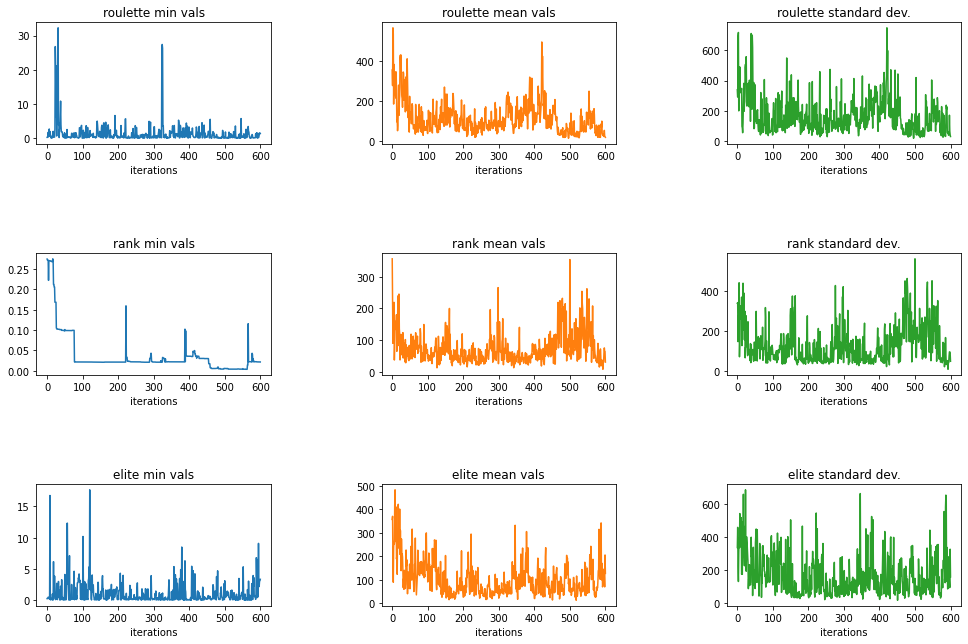

In [24]:
'''PLOTTING'''
iterations = [i for i in range(601)] # includes initial value before completion of first iteration

#DeJong2
fig, axs = plt.subplots(3, 3) # 3 statistics for the 3 search methods 

axs[0, 0].plot(iterations,min_rou_2)
axs[0, 0].set_title('roulette min vals')
axs[0, 1].plot(iterations,mean_rou_2, 'tab:orange')
axs[0, 1].set_title('roulette mean vals')
axs[0, 2].plot(iterations,std_rou_2, 'tab:green')
axs[0, 2].set_title('roulette standard dev.')

axs[1, 0].plot(iterations,min_rank_2)
axs[1, 0].set_title('rank min vals')
axs[1, 1].plot(iterations,mean_rank_2, 'tab:orange')
axs[1, 1].set_title('rank mean vals')
axs[1, 2].plot(iterations,std_rank_2, 'tab:green')
axs[1, 2].set_title('rank standard dev.')

axs[2, 0].plot(iterations,min_el_2)
axs[2, 0].set_title('elite min vals')
axs[2, 1].plot(iterations,mean_el_2, 'tab:orange')
axs[2, 1].set_title('elite mean vals')
axs[2, 2].plot(iterations,std_el_2, 'tab:green')
axs[2, 2].set_title('elite standard dev.')

fig.tight_layout()
    
for ax in axs.flat:
    ax.set(xlabel='iterations', ylabel='')
# for ax in axs.flat:
#     ax.label_outer()
# plt.title('Minimum value across iterations')
# plt.xlabel('Iteration Count')
# plt.ylabel('Min value')
# plt.rcParams["figure.resolution"]=(1000)
fig.set_size_inches(15, 10)
plt.show()

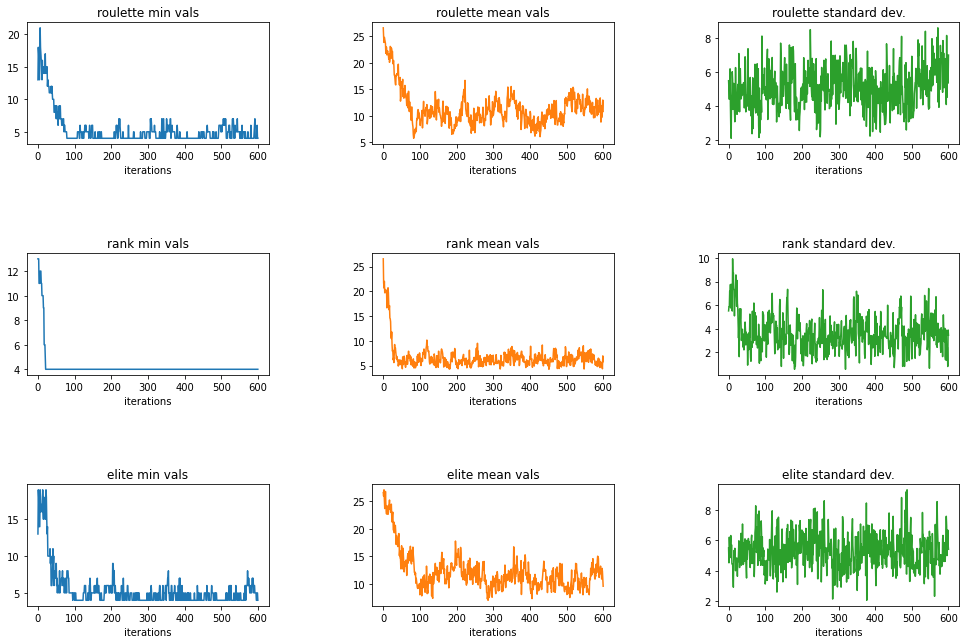

In [25]:

#DeJong3
fig, axs = plt.subplots(3, 3) # 3 statistics for the 3 search methods 

axs[0, 0].plot(iterations,min_rou_3)
axs[0, 0].set_title('roulette min vals')
axs[0, 1].plot(iterations,mean_rou_3, 'tab:orange')
axs[0, 1].set_title('roulette mean vals')
axs[0, 2].plot(iterations,std_rou_3, 'tab:green')
axs[0, 2].set_title('roulette standard dev.')

axs[1, 0].plot(iterations,min_rank_3)
axs[1, 0].set_title('rank min vals')
axs[1, 1].plot(iterations,mean_rank_3, 'tab:orange')
axs[1, 1].set_title('rank mean vals')
axs[1, 2].plot(iterations,std_rank_3, 'tab:green')
axs[1, 2].set_title('rank standard dev.')

axs[2, 0].plot(iterations,min_el_3)
axs[2, 0].set_title('elite min vals')
axs[2, 1].plot(iterations,mean_el_3, 'tab:orange')
axs[2, 1].set_title('elite mean vals')
axs[2, 2].plot(iterations,std_el_3, 'tab:green')
axs[2, 2].set_title('elite standard dev.')

fig.tight_layout()
    
for ax in axs.flat:
    ax.set(xlabel='iterations', ylabel='')
# for ax in axs.flat:
#     ax.label_outer()
# plt.title('Minimum value across iterations')
# plt.xlabel('Iteration Count')
# plt.ylabel('Min value')
#plt.rcParams["figure.resolution"]=(1000)
fig.set_size_inches(15, 10)

plt.show()

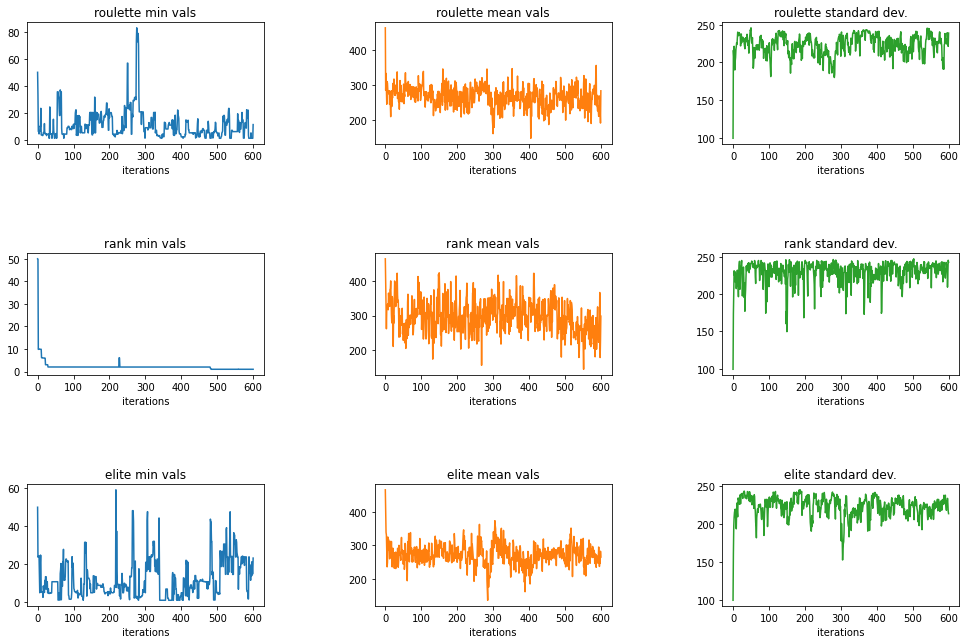

In [26]:
#DeJong5
fig, axs = plt.subplots(3, 3) # 3 statistics for the 3 search methods 

axs[0, 0].plot(iterations,min_rou_5)
axs[0, 0].set_title('roulette min vals')
axs[0, 1].plot(iterations,mean_rou_5, 'tab:orange')
axs[0, 1].set_title('roulette mean vals')
axs[0, 2].plot(iterations,std_rou_5, 'tab:green')
axs[0, 2].set_title('roulette standard dev.')

axs[1, 0].plot(iterations,min_rank_5)
axs[1, 0].set_title('rank min vals')
axs[1, 1].plot(iterations,mean_rank_5, 'tab:orange')
axs[1, 1].set_title('rank mean vals')
axs[1, 2].plot(iterations,std_rank_5, 'tab:green')
axs[1, 2].set_title('rank standard dev.')

axs[2, 0].plot(iterations,min_el_5)
axs[2, 0].set_title('elite min vals')
axs[2, 1].plot(iterations,mean_el_5, 'tab:orange')
axs[2, 1].set_title('elite mean vals')
axs[2, 2].plot(iterations,std_el_5, 'tab:green')
axs[2, 2].set_title('elite standard dev.')

fig.tight_layout()
    
for ax in axs.flat:
    ax.set(xlabel='iterations', ylabel='')
# for ax in axs.flat:
#     ax.label_outer()
# plt.title('Minimum value across iterations')
# plt.xlabel('Iteration Count')
# plt.ylabel('Min value')
#plt.rcParams["figure.resolution"]=(1000)
fig.set_size_inches(15, 10)

plt.show()